<a href="https://colab.research.google.com/github/ashrafalaghbari/customer_churn_prediction/blob/main/customer_churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


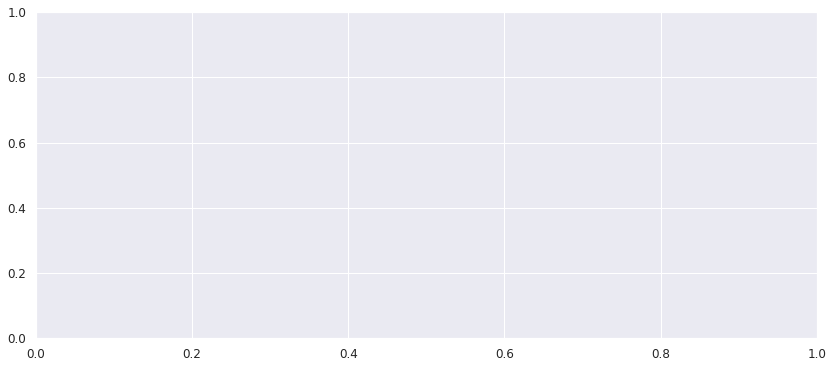

In [1]:
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import plotly.express as px
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
# maximize the size of the labels, ticks, and figures
plt.rcParams['figure.figsize'] = (14, 6)
plt.rcParams['font.size'] = 14
plt.tick_params(labelsize=12)
!pip install hdbscan
!pip install kmodes
from kmodes.kprototypes import KPrototypes

In [ ]:
df =  pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")

* **Demographic variables:** 'gender', 'SeniorCitizen', 'Partner', 'Dependents'
* **Contracts and billing:** 'Contract', 'PaperlessBilling','PaymentMethod',
* **Additional services used:** 'PhoneService', 'MultipleLines', 'InternetService','OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport','StreamingTV', 'StreamingMovies'
* **Customer monetary value and tenure:** 'MonthlyCharges', 'TotalCharges','tenure'
* **Churn behavior:** 'Churn'

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
# remove customerID variable 
del df['customerID']

In [ ]:
# convert the data type of senior citizen to int8 so I can include in the categorical features
df['SeniorCitizen'] = df['SeniorCitizen'].astype('int8') 
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [ ]:
#count both categorical and numerical columns
cat_features = df.select_dtypes(include=['object', 'int8'])
num_features = df.select_dtypes(include=['int64', 'float64'])

print(f"The number of categorical features in the DataFrame is: {cat_features.shape[1]}")
print(f"The number of numerical features in the DataFrame is: {num_features.shape[1]}")

The number of categorical features in the DataFrame is: 17
The number of numerical features in the DataFrame is: 3


In [ ]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [ ]:
df[df.isnull().any(axis=1)]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


* Since the customer has a tenure of zero, they have not been using the product or service for any complete billing cycle, and therefore their total charges should be zero.

In [ ]:
df.loc[df['tenure']==0, 'TotalCharges'] = 0

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [ ]:
#Encoding  categorical features with more than two categories
df = pd.get_dummies(df, drop_first=True)

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

predictors = df.drop(['Churn_Yes'], axis=1)
target = df['Churn_Yes']
# split data into 80% training and 20% test sets
X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
print(f'Training set: {X_train.shape} shape')
print(f'Test set: {X_test.shape} shape')

Training set: (5634, 30) shape
Test set: (1409, 30) shape


In [ ]:
# from sklearn.model_selection import train_test_split, GridSearchCV

# predictors = df.drop(['Churn_Yes'], axis=1)
# target = df['Churn_Yes']
# # split data into 80% training and 20% test sets
# X_train, X_test, y_train, y_test = train_test_split(predictors, target, test_size=0.2, random_state=42)
# print(f'Training set: {X_train.shape} shape')
# print(f'Test set: {X_test.shape} shape')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train[num_features.columns] = scaler.fit_transform(X_train[num_features.columns])
X_test[num_features.columns] = scaler.transform(X_test[num_features.columns])

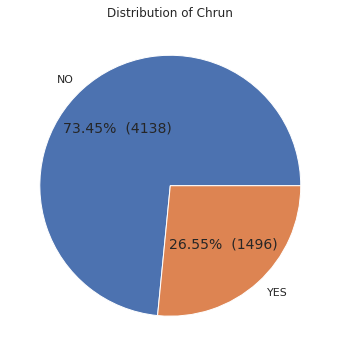

In [ ]:
explode = [0.03,0.1]
plt.title('Class Distribution')
plt.ylabel("")

values = [y_train.value_counts()[0],y_train.value_counts()[1]] 
labels = ['NO','YES'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('Distribution of Chrun')
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

# # Random undersampling
# rus = RandomUnderSampler(random_state=42)
# X_train_rus, y_train_rus= rus.fit_resample(X_train, y_train)

# # Random oversampling
ros = RandomOverSampler(random_state=42)
X_train, y_train = ros.fit_resample(X_train, y_train)

# SMOTE oversampling
# smote = SMOTE(random_state=42)
# X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


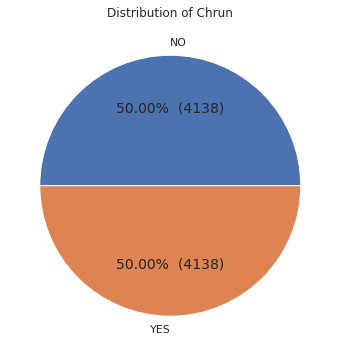

In [ ]:
explode = [0.03,0.1]
plt.title('Class Distribution')
plt.ylabel("")

values = [y_train.value_counts()[0],y_train.value_counts()[1]] 
labels = ['NO','YES'] 

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
    return my_autopct
plt.title('Distribution of Chrun')
plt.pie(values, labels=labels, autopct=make_autopct(values))
plt.show()

# Cluster analysis

PCA works by finding the principal components of the data, which are linear combinations of the original features that explain the most variation in the data. These principal components can be used as new features in place of the original features, which can help reduce the dimensionality of the data. By reducing the dimensionality of the data using PCA, K-means can become more computationally efficient and can produce better clustering results. This is because the reduced feature space is often more informative and less noisy than the original high-dimensional feature space.

# Multiple Correspondence Analysis (MCA) dimensionality reduction

In [ ]:
! pip install prince

In [ ]:
from prince import MCA
X_train_cat = X_train[cat_features.drop(['Churn'], axis=1).columns]
num_components = len(X_train_cat.columns)
mca = MCA(n_components= num_components,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
)

mca = mca.fit(X_train_cat)

The cumulative explained variance for 9 components is 0.7995482957611577


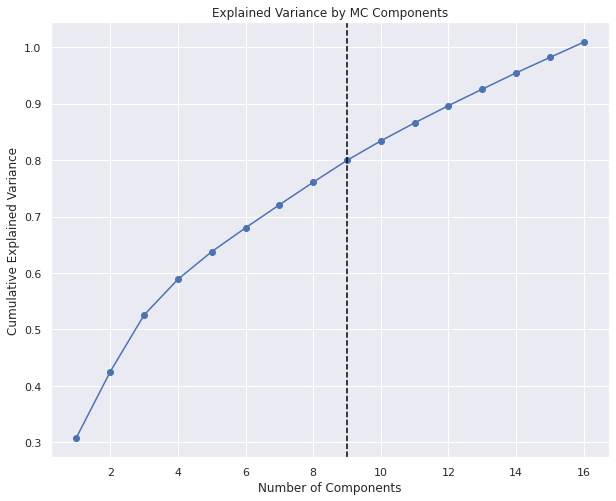

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1,num_components+1), np.cumsum(mca.explained_inertia_), marker = 'o', linestyle = '-')
plt.title('Explained Variance by MC Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.axvline(x=9, color='black',linestyle = '--')
print(f'The cumulative explained variance for 9 components is {np.cumsum(mca.explained_inertia_)[8]}')

In [ ]:
X_train_cat = X_train[cat_features.drop(['Churn'], axis=1).columns]
num_components = 10
mca = MCA(n_components= num_components,
        n_iter=3,
        copy=True,
        check_input=True,
        engine='auto',
        random_state=42
)

scores_mca = mca.fit_transform(X_train_cat)

In [ ]:
df_for_cluster = pd.concat([scores_mca, X_train[num_features.columns]], axis=1).values
df_for_cluster

In [ ]:
df_for_cluster = scores_mca.values
df_for_cluster

array([[-0.08068289,  0.2978586 ,  0.31195351, ...,  0.51909518,
        -0.18886155, -0.10498691],
       [-0.29470916,  0.21246652, -0.43252998, ..., -0.04391692,
         0.10259729,  0.06252222],
       [-0.48466116, -0.23230042,  1.07846765, ..., -0.17432871,
         0.08478827, -0.00864993],
       ...,
       [-0.42852477, -0.3776317 , -0.40234071, ..., -0.24074967,
        -0.0756767 , -0.05086445],
       [-0.37495338, -0.17073931, -0.25893019, ..., -0.33156672,
         0.47547117, -0.17995918],
       [-0.36864392, -0.17739783, -0.26451346, ...,  0.12736105,
         0.18467409,  0.11674134]])

# Partitioning clustering algorithms

# K-means

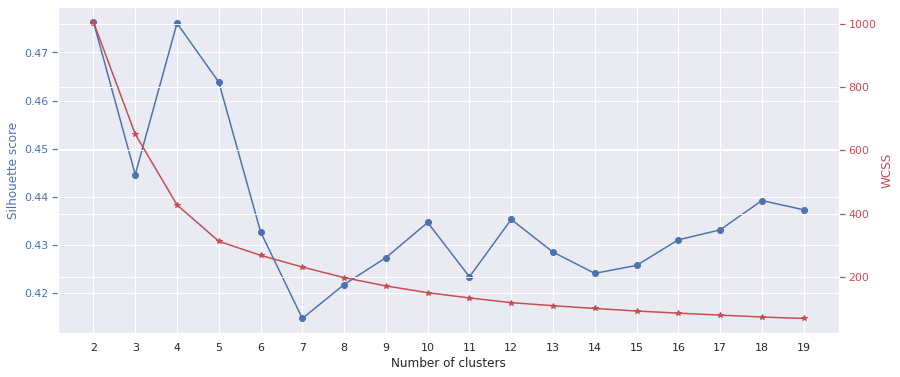

In [ ]:
# compute silhouette score and WCSS for each cluster size
range_n_clusters = np.arange(2, 20)
silhouette_scores = []
wcss = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(X_train[num_features.columns])
    silhouette_scores.append(silhouette_score(X_train[num_features.columns], cluster_labels))
    wcss.append(kmeans.inertia_)

    

# create figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot silhouette scores on first y-axis
ax1.plot(range_n_clusters, silhouette_scores, 'bo-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Silhouette score', color='b')
ax1.tick_params('y', colors='b')

# plot WCSS on second y-axis
ax2.plot(range_n_clusters, wcss, 'r*-')
ax2.set_ylabel('WCSS', color='r')
ax2.tick_params('y', colors='r')

plt.xticks(range_n_clusters)
plt.show()




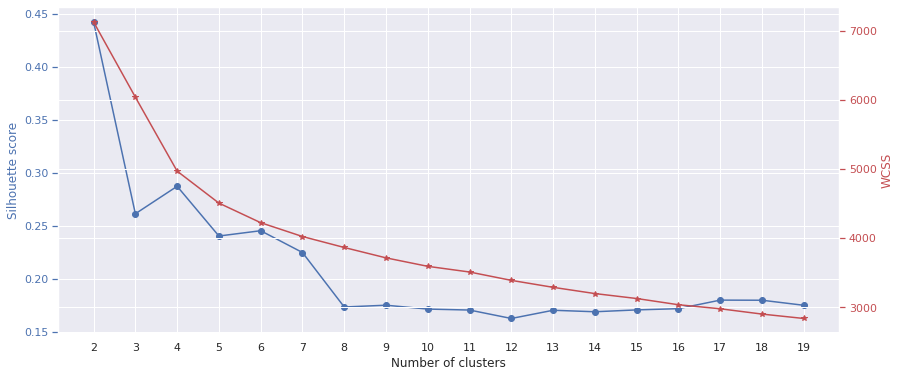

In [ ]:
# compute silhouette score and WCSS for each cluster size
range_n_clusters = np.arange(2, 20)
silhouette_scores = []
wcss = []
for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++', random_state=42)
    cluster_labels = kmeans.fit_predict(df_for_cluster)
    silhouette_scores.append(silhouette_score(df_for_cluster, cluster_labels))
    wcss.append(kmeans.inertia_)

    

# create figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot silhouette scores on first y-axis
ax1.plot(range_n_clusters, silhouette_scores, 'bo-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Silhouette score', color='b')
ax1.tick_params('y', colors='b')

# plot WCSS on second y-axis
ax2.plot(range_n_clusters, wcss, 'r*-')
ax2.set_ylabel('WCSS', color='r')
ax2.tick_params('y', colors='r')

plt.xticks(range_n_clusters)
plt.show()




# K-prototype

In [ ]:
X_train.iloc[:,:5]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male
0,0,0.291667,0.464375,0.153924,0
1,0,0.750000,0.786746,0.590624,0
2,0,0.013889,0.051819,0.002700,1
3,0,0.055556,0.517688,0.027398,1
4,0,0.000000,0.434978,0.000000,1
...,...,...,...,...,...
8271,0,0.111111,0.565521,0.072880,1
8272,0,0.291667,0.853513,0.259557,0
8273,1,0.027778,0.753363,0.022655,1
8274,1,0.069444,0.614350,0.039604,1


In [ ]:
sns.scatterplot()

In [ ]:

kproto = KPrototypes(n_clusters=3, verbose=True,)

# specify which columns in the data are categorical (columns 0 and 1)
clusters = kproto.fit_predict(X_train.iloc[:,:5], categorical=[0, 4])
#join data with labels 
labels = pd.DataFrame(clusters)
labeledCustomers = pd.concat((X_train,labels),axis=1)
labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

In [ ]:
# Print cluster centroids of the trained model.
print('KPrototypes centroids:')
print(kproto.cluster_centroids_)
# Print training statistics
print('Final training cost: {}'.format(kproto.cost_))
print('Training iterations: {}'.format(kproto.n_iter_))

KPrototypes centroids:
[[0.78148069 0.72002043 0.58599588 0.         1.        ]
 [0.3165901  0.13271567 0.07736686 0.         1.        ]
 [0.17532525 0.60096423 0.11637892 0.         0.        ]]
Final training cost: 1379.1859640098066
Training iterations: 9


In [ ]:
labeledCustomers.iloc[:, [0, 1, 2, 3, 4, -1]]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,labels
0,0,0.291667,0.464375,0.153924,0,2
1,0,0.750000,0.786746,0.590624,0,0
2,0,0.013889,0.051819,0.002700,1,1
3,0,0.055556,0.517688,0.027398,1,2
4,0,0.000000,0.434978,0.000000,1,1
...,...,...,...,...,...,...
8271,0,0.111111,0.565521,0.072880,1,2
8272,0,0.291667,0.853513,0.259557,0,2
8273,1,0.027778,0.753363,0.022655,1,2
8274,1,0.069444,0.614350,0.039604,1,2


<AxesSubplot:xlabel='tenure', ylabel='MonthlyCharges'>

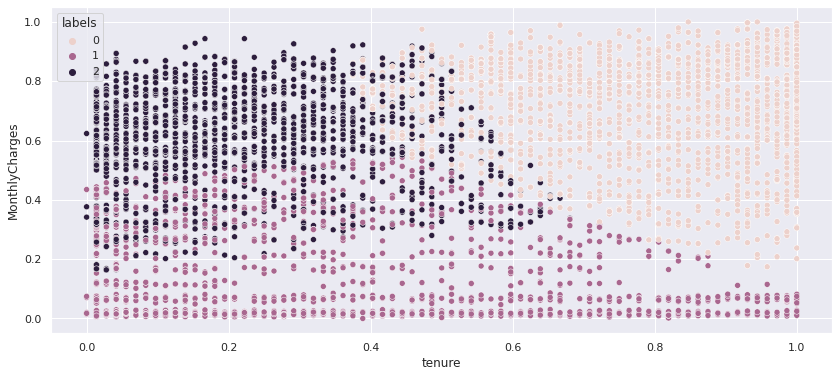

In [ ]:
sns.scatterplot(labeledCustomers.iloc[:, 1], labeledCustomers.iloc[:, 2], hue=labeledCustomers.iloc[:, -1])

In [ ]:
labeledCustomers.iloc[:, 1].name

'tenure'

In [84]:
import plotly.graph_objs as go
%matplotlib notebook


In [ ]:

# Create the 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=labeledCustomers.iloc[:, 1],
    y=labeledCustomers.iloc[:, 2],
    z=labeledCustomers.iloc[:, 3],
    mode='markers',
    marker=dict(
        color=labeledCustomers.iloc[:, -1],
        size=5,
        opacity=0.8,
        colorscale='Viridis'
    ),
    hovertext=labeledCustomers.iloc[:, -1]
)])

# Customize the plot
fig.update_layout(
    title='Interactive 3D Scatter Plot',
    scene=dict(
        xaxis_title=labeledCustomers.iloc[:, 1].name,
        yaxis_title=labeledCustomers.iloc[:, 2].name,
        zaxis_title=labeledCustomers.iloc[:, 3].name,
        hovermode='closest',
        camera=dict(
            up=dict(x=0, y=0, z=1),
            center=dict(x=0, y=0, z=0),
            eye=dict(x=1.5, y=1.5, z=1.5)
        )
    ),
    margin=dict(l=0, r=0, b=0, t=30)
)

# Show the plot
fig.show()




<IPython.core.display.Javascript object>

In [48]:
import numpy as np
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist

In [47]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

In [ ]:
X = pd.DataFrame(X)
distances = pdist(X, metric='euclidean')
print(distances)

[ 5.19615242 10.39230485  5.19615242]


In [ ]:
import pandas as pd

In [3]:
from sklearn.datasets import make_blobs

In [197]:
data1

,Numeric,Categorical,cluster_HAC
0,9.959029,A,2
1,7.785968,A,2
2,8.408268,A,2
3,4.714859,A,2
4,3.786797,A,2
...,...,...,...
95,21.175380,C,1
96,24.812834,C,1
97,28.164096,C,1
98,27.181844,C,1


In [202]:
data1

,Numeric,Categorical
0,9.959029,A
1,7.785968,A
2,8.408268,A
3,4.714859,A
4,3.786797,A
...,...,...
95,21.175380,C
96,24.812834,C
97,28.164096,C
98,27.181844,C


In [205]:


kproto = KPrototypes(n_clusters=5, init='Cao')

# specify which columns in the data are categorical (columns 0 and 1)
clusters = kproto.fit_predict(data1, categorical=[1])
#join data with labels 
# labels = pd.DataFrame(clusters)
# labeledCustomers = pd.concat((data1,labels),axis=1)
# labeledCustomers = labeledCustomers.rename({0:'labels'},axis=1)

In [208]:
labels = pd.DataFrame(clusters)

In [209]:
pd.concat((data1,labels),axis=1)

InvalidIndexError: ignored

In [95]:
from gower import gower_matrix

In [62]:
D=pdist(X, metric='euclidean')
D.shape

(190,)

In [176]:
import numpy as np
import pandas as pd

# Define the number of clusters and the number of data points in each cluster
num_clusters = 3
num_points = 100

# Define the possible categories for the categorical variable
categories = ['A', 'B', 'C']

# Generate random data for each cluster
data = []
for i in range(num_clusters):
    # Generate random values for the numeric variable
    min_val = i * 10
    max_val = (i + 1) * 10
    numeric_data = np.random.uniform(low=min_val, high=max_val, size=num_points)
    
    # Generate random values for the categorical variable
    categorical_data = np.random.choice(categories, size=num_points)
    
    # Combine the numeric and categorical data into a single DataFrame
    cluster_data = pd.DataFrame({
        'Numeric': numeric_data,
        'Categorical': categorical_data
    })
    
    # Add the cluster number as a column
    cluster_data['Cluster'] = i
    
    # Add the data for this cluster to the overall dataset
    data.append(cluster_data)

# Combine the data for all clusters into a single DataFrame
data = pd.concat(data)

# Print the first few rows of the dataset
print(data.head())


    Numeric Categorical  Cluster
0  9.959029           B        0
1  7.785968           A        0
2  8.408268           A        0
3  4.714859           A        0
4  3.786797           C        0


In [177]:
data.loc[data['Cluster'] ==0,'Categorical']='A'
data.loc[data['Cluster'] ==1,'Categorical']='B'
data.loc[data['Cluster'] ==2,'Categorical']='C'

In [189]:
s = pd.concat([data1, data.iloc[:,-1]], axis=1)

In [190]:
s.loc[s['Cluster']==0]

,Numeric,Categorical,cluster_HAC,Cluster
0,9.959029,A,2,0
1,7.785968,A,2,0
2,8.408268,A,2,0
3,4.714859,A,2,0
4,3.786797,A,2,0
...,...,...,...,...
95,7.257041,A,2,0
96,1.077728,A,2,0
97,5.017921,A,2,0
98,8.934768,A,2,0


In [192]:
s.loc[s['Cluster']==1]

,Numeric,Categorical,cluster_HAC,Cluster
0,14.036816,B,3,1
1,10.035241,B,3,1
2,10.249703,B,3,1
3,10.532645,B,3,1
4,17.654021,B,3,1
...,...,...,...,...
95,13.422363,B,3,1
96,13.209253,B,3,1
97,14.430643,B,3,1
98,14.497820,B,3,1


In [195]:
s.loc[s['Cluster']==2]

,Numeric,Categorical,cluster_HAC,Cluster
0,26.196964,C,1,2
1,26.782125,C,1,2
2,24.572667,C,1,2
3,23.272457,C,1,2
4,24.736900,C,1,2
...,...,...,...,...
95,21.175380,C,1,2
96,24.812834,C,1,2
97,28.164096,C,1,2
98,27.181844,C,1,2


In [198]:
data1 = data.iloc[:,:2]
data1

,Numeric,Categorical
0,9.959029,A
1,7.785968,A
2,8.408268,A
3,4.714859,A
4,3.786797,A
...,...,...
95,21.175380,C
96,24.812834,C
97,28.164096,C
98,27.181844,C


In [196]:
data1.describe()

,Numeric,cluster_HAC
count,300.000000,300.000000
mean,15.044466,2.000000
std,8.893202,0.817861
min,0.337943,1.000000
25%,7.810226,1.000000
50%,14.446090,2.000000
75%,22.800956,3.000000
max,29.907662,3.000000


In [182]:
from scipy.spatial.distance import squareform

#gower's dissmilarity metric 
gower_dist = gower_matrix(data1)
x = pd.DataFrame(gower_dist)
x

# condense the distance matrix
condensed_distances = squareform(x)

In [183]:
x

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0.000000,0.036745,0.026222,0.088675,0.104367,0.122488,0.159296,0.160398,0.112939,0.130543,...,0.767482,0.814032,0.787325,0.677631,0.695118,0.689659,0.751166,0.807833,0.791224,0.704810
1,0.036745,0.000000,0.010523,0.051930,0.067623,0.085743,0.122552,0.123653,0.076194,0.093799,...,0.804226,0.850777,0.824069,0.714376,0.731863,0.726404,0.787911,0.844578,0.827969,0.741555
2,0.026222,0.010523,0.000000,0.062453,0.078145,0.096266,0.133074,0.134176,0.086717,0.104321,...,0.793704,0.840254,0.813547,0.703853,0.721340,0.715882,0.777388,0.834055,0.817446,0.731032
3,0.088675,0.051930,0.062453,0.000000,0.015693,0.033813,0.070622,0.071723,0.024264,0.041869,...,0.856156,0.902707,0.875999,0.766306,0.783793,0.778334,0.839840,0.896508,0.879899,0.793485
4,0.104367,0.067623,0.078145,0.015693,0.000000,0.018120,0.054929,0.056031,0.008572,0.026176,...,0.871849,0.918399,0.891692,0.781999,0.799486,0.794027,0.855533,0.912200,0.895591,0.809178
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.689659,0.726404,0.715882,0.778334,0.794027,0.812147,0.848956,0.850058,0.802598,0.820203,...,0.077822,0.124372,0.097665,0.012028,0.005459,0.000000,0.061506,0.118174,0.101564,0.015151
296,0.751166,0.787911,0.777388,0.839840,0.855533,0.873654,0.910462,0.911564,0.864105,0.881709,...,0.016316,0.062866,0.036159,0.073535,0.056048,0.061506,0.000000,0.056667,0.040058,0.046356
297,0.807833,0.844578,0.834055,0.896508,0.912200,0.930321,0.967129,0.968231,0.920772,0.938376,...,0.040351,0.006199,0.020508,0.130202,0.112715,0.118174,0.056667,0.000000,0.016609,0.103023
298,0.791224,0.827969,0.817446,0.879899,0.895591,0.913712,0.950520,0.951622,0.904163,0.921767,...,0.023742,0.022808,0.003899,0.113593,0.096106,0.101564,0.040058,0.016609,0.000000,0.086414


In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

D = pairwise_distances(X = X, metric = 'euclidean', n_jobs = -1)
pd.DataFrame(D)

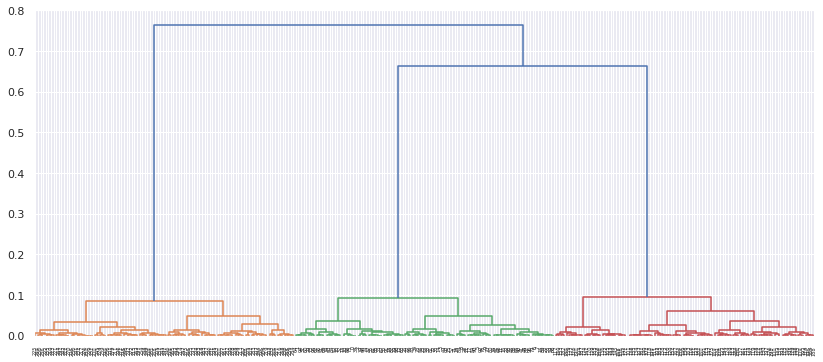

In [184]:
linkage_data =linkage(condensed_distances , method='average')
dendrogram(linkage_data)
plt.show()

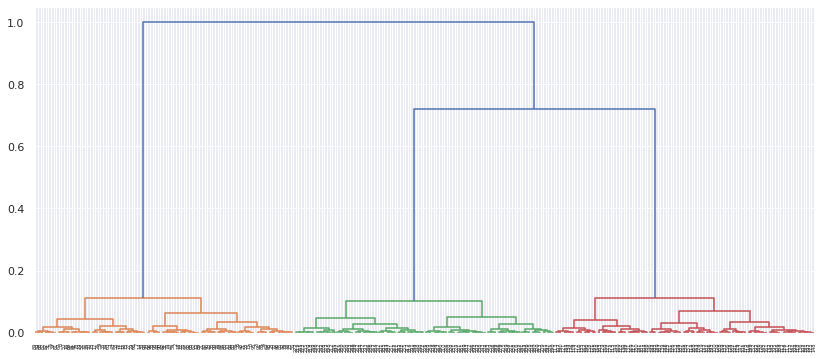

In [151]:
linkage_data =linkage(condensed_distances , method='complete')
dendrogram(linkage_data)
plt.show()

In [185]:
# Set the threshold to obtain two clusters
threshold = 0.5

# Obtain the cluster assignments for each data point
labels = fcluster(linkage_data, threshold, criterion='distance')
labels 
# Assuming the original data is stored in a DataFrame called "df"
data1['cluster_HAC'] = labels

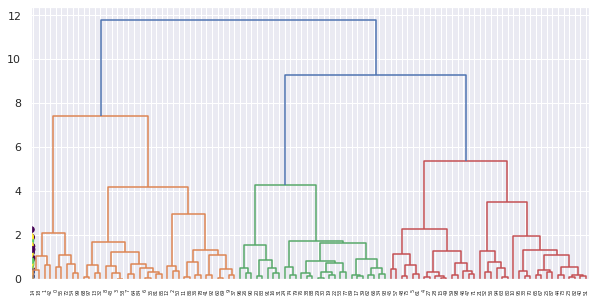

In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Generate some sample data
np.random.seed(0)
X = np.random.randn(100, 2)

# Compute the linkage matrix and dendrogram
Z = linkage(X, method='ward')
fig, ax = plt.subplots(figsize=(10, 5))
dendrogram(Z, ax=ax)

# Set the threshold to obtain two clusters
threshold = 5

# Obtain the cluster assignments for each data point
labels = fcluster(Z, threshold, criterion='distance')

# Plot the clusters
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.show()


In [ ]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [93]:
!pip install gower

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
0.44/4

0.11

In [ ]:
gower_dist = gower_matrix(customers)
x = pd.DataFrame(gower_dist)[0].sort_values()

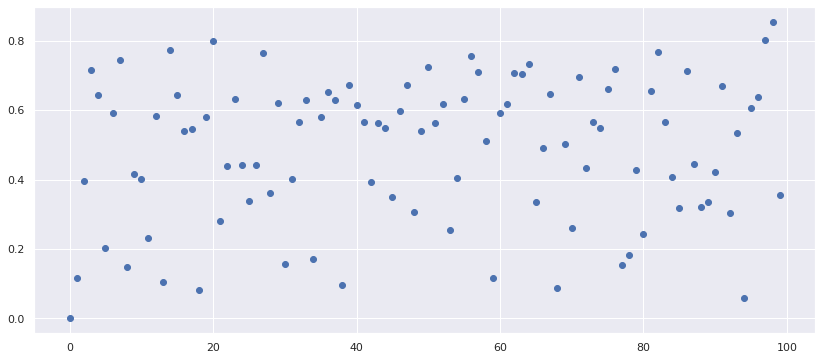

In [ ]:
plt.scatter(x= x.index, y=x)

In [ ]:
from gower import gower_matrix
# compute the gower distance matrix
gower_dist = gower_matrix(customers.head(20) )
pd.DataFrame(gower_dist)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.000000,0.124920,0.407068,0.735074,0.656254,0.219034,0.597946,0.759376,0.159685,0.429472,0.411811,0.245849,0.590207,0.111583,0.789398,0.651978,0.559111,0.549795,0.086351,0.587310
1,0.124920,0.000000,0.391765,0.737672,0.694217,0.094114,0.538243,0.634456,0.034764,0.325883,0.321804,0.120929,0.621670,0.056816,0.664478,0.527058,0.434191,0.674716,0.038569,0.559350
2,0.407068,0.391765,0.000000,0.345907,0.324191,0.311966,0.430009,0.504482,0.361312,0.065882,0.069961,0.469216,0.316861,0.334950,0.491026,0.397085,0.695522,0.456863,0.353197,0.332416
3,0.735074,0.737672,0.345907,0.000000,0.402198,0.657873,0.525915,0.600389,0.707219,0.411789,0.415868,0.815122,0.394867,0.680856,0.586933,0.492991,0.791428,0.534870,0.699103,0.428322
4,0.656254,0.694217,0.324191,0.402198,0.000000,0.636157,0.482461,0.556934,0.663764,0.368334,0.372413,0.771668,0.072548,0.637402,0.293478,0.449536,0.497974,0.171676,0.655649,0.134868
5,0.219034,0.094114,0.311966,0.657873,0.636157,0.000000,0.621088,0.692516,0.059349,0.289562,0.307223,0.157250,0.628827,0.107451,0.679060,0.585118,0.383556,0.768829,0.132683,0.631724
6,0.597946,0.538243,0.430009,0.525915,0.482461,0.621088,0.000000,0.161430,0.568696,0.364127,0.360048,0.647903,0.409913,0.595059,0.441452,0.054032,0.711165,0.397742,0.576812,0.347593
7,0.759376,0.634456,0.504482,0.600389,0.556934,0.692516,0.161430,0.000000,0.643170,0.438600,0.434521,0.535266,0.484386,0.669532,0.280023,0.107398,0.558960,0.559171,0.673025,0.422066
8,0.159685,0.034764,0.361312,0.707219,0.663764,0.059349,0.568696,0.643170,0.000000,0.295430,0.291351,0.107903,0.591217,0.048102,0.629714,0.535772,0.399427,0.709480,0.073333,0.572375
9,0.429472,0.325883,0.065882,0.411789,0.368334,0.289562,0.364127,0.438600,0.295430,0.000000,0.017660,0.403334,0.339265,0.317889,0.425144,0.331202,0.629640,0.479267,0.343120,0.342162


In [ ]:
cat_features = X_train.select_dtypes(include=['uint8', 'int8'])
[X_train.columns.get_loc(col) for col in cat_features.columns]

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male
0,0,0.291667,0.464375,0.153924,0
1,0,0.750000,0.786746,0.590624,0
2,0,0.013889,0.051819,0.002700,1
3,0,0.055556,0.517688,0.027398,1
4,0,0.000000,0.434978,0.000000,1
...,...,...,...,...,...
8271,0,0.111111,0.565521,0.072880,1
8272,0,0.291667,0.853513,0.259557,0
8273,1,0.027778,0.753363,0.022655,1
8274,1,0.069444,0.614350,0.039604,1


In [ ]:
KPrototype = KPrototypes(n_clusters=3, random_state=42)
cluster_labels = KPrototype.fit_predict(X_train.iloc[:,:5], categorical= [0,4])

In [ ]:
wcss

[1785.2677131363052]

In [ ]:
 X_train.iloc[:,[X_train.columns.get_loc(col) for col in cat_features.columns]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8276 entries, 0 to 8275
Data columns (total 27 columns):
 #   Column                                 Non-Null Count  Dtype
---  ------                                 --------------  -----
 0   SeniorCitizen                          8276 non-null   int8 
 1   gender_Male                            8276 non-null   uint8
 2   Partner_Yes                            8276 non-null   uint8
 3   Dependents_Yes                         8276 non-null   uint8
 4   PhoneService_Yes                       8276 non-null   uint8
 5   MultipleLines_No phone service         8276 non-null   uint8
 6   MultipleLines_Yes                      8276 non-null   uint8
 7   InternetService_Fiber optic            8276 non-null   uint8
 8   InternetService_No                     8276 non-null   uint8
 9   OnlineSecurity_No internet service     8276 non-null   uint8
 10  OnlineSecurity_Yes                     8276 non-null   uint8
 11  OnlineBackup_No internet servi

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/100, moves: 2239, ncost: 8586.30289765237
Run: 1, iteration: 2/100, moves: 913, ncost: 8489.619910770056
Run: 1, iteration: 3/100, moves: 272, ncost: 8485.9395531291
Run: 1, iteration: 4/100, moves: 20, ncost: 8485.907116280901
Run: 1, iteration: 5/100, moves: 1, ncost: 8485.906966288581
Run: 1, iteration: 6/100, moves: 0, ncost: 8485.906966288581
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/100, moves: 1273, ncost: 8496.408565350617
Run: 2, iteration: 2/100, moves: 459, ncost: 8486.074747950275
Run: 2, iteration: 3/100, moves: 49, ncost: 8485.907640315301
Run: 2, iteration: 4/100, moves: 2, ncost: 8485.906966288574
Run: 2, iteration: 5/100, moves: 0, ncost: 8485.906966288574
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

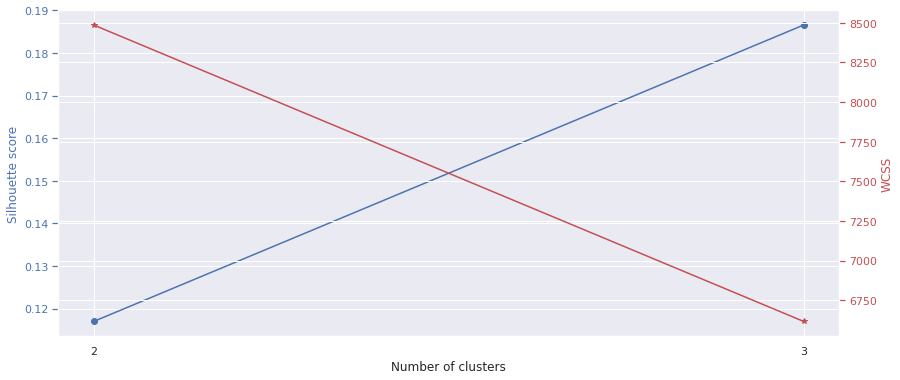

In [ ]:
# compute silhouette score and WCSS for each cluster size
range_n_clusters = np.arange(2, 4)
silhouette_scores = []
wcss = []
for n_clusters in range_n_clusters:
    KPrototype = KPrototypes(n_clusters=n_clusters, verbose=True, random_state=42)
    cluster_labels = KPrototype.fit_predict(X_train, categorical= [X_train.columns.get_loc(col) for col in cat_features.columns])
    silhouette_scores.append(silhouette_score(X_train, cluster_labels))
    wcss.append(KPrototype.cost_)

# create figure with two y-axes
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

# plot silhouette scores on first y-axis
ax1.plot(range_n_clusters, silhouette_scores, 'bo-')
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Silhouette score', color='b')
ax1.tick_params('y', colors='b')

# plot WCSS on second y-axis
ax2.plot(range_n_clusters, wcss, 'r*-')
ax2.set_ylabel('WCSS', color='r')
ax2.tick_params('y', colors='r')

plt.xticks(range_n_clusters)
plt.show()


# HDBSCAN

In [ ]:
!pip install gower
from gower import gower_matrix
# compute the gower distance matrix
gower_dist = gower_matrix(X_train)
gower_dist

In [ ]:
import hdbscan
clusterer = hdbscan.HDBSCAN(min_cluster_size=10)
cluster_labels = clusterer.fit_predict(df_for_cluster)

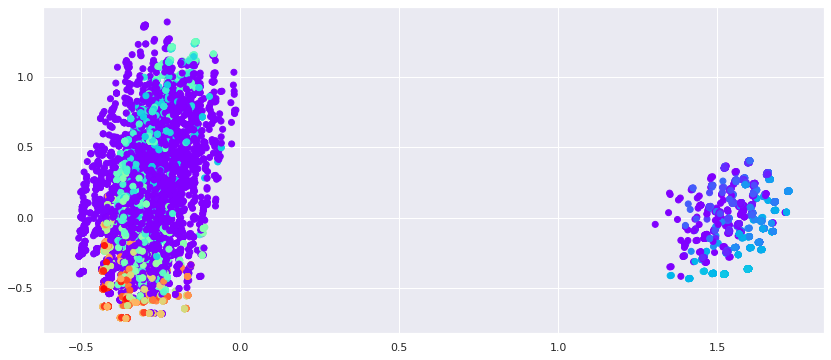

In [ ]:
X= df_for_cluster
plt.scatter(X[:, 0], X[:, 1], c=cluster_labels, cmap='rainbow')
plt.show()

In [ ]:
# check the rate of change in within cluster sum of squares 
wcss = np.array(wcss)
diff_scores = wcss / wcss[0]
abs(np.diff(diff_scores))

array([0.35282494, 0.22247804, 0.11457454, 0.04412428, 0.03685163,
       0.03330531, 0.02599348, 0.02137849, 0.01643602, 0.01490425,
       0.00956914, 0.00867412, 0.00800224, 0.00677825, 0.00611658,
       0.00604447, 0.00455371])

In [ ]:
range_n_clusters = np.arange(2,6)
X= df_for_cluster

For n_clusters = 2 The average silhouette_score is : 0.44288197109120453
For n_clusters = 3 The average silhouette_score is : 0.26169720708938204
For n_clusters = 4 The average silhouette_score is : 0.28766027325952415
For n_clusters = 5 The average silhouette_score is : 0.24067264071095332


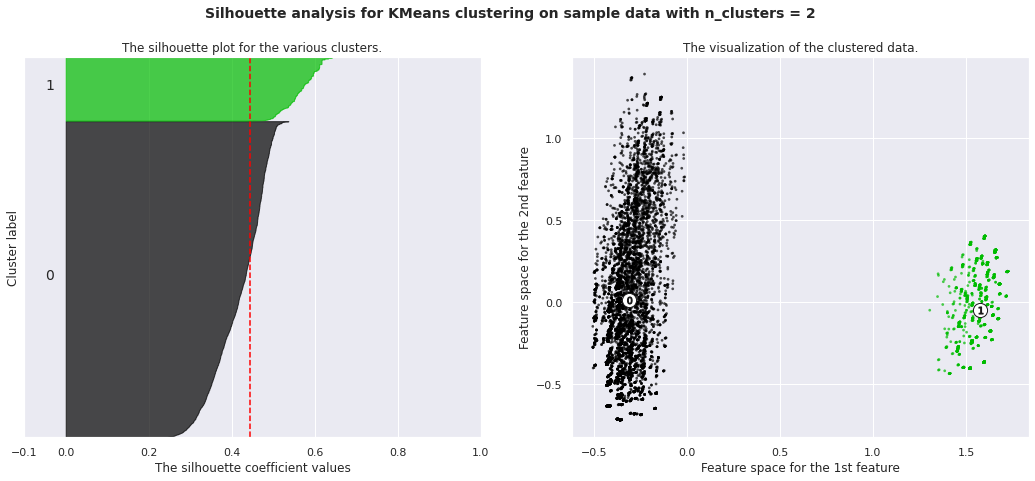

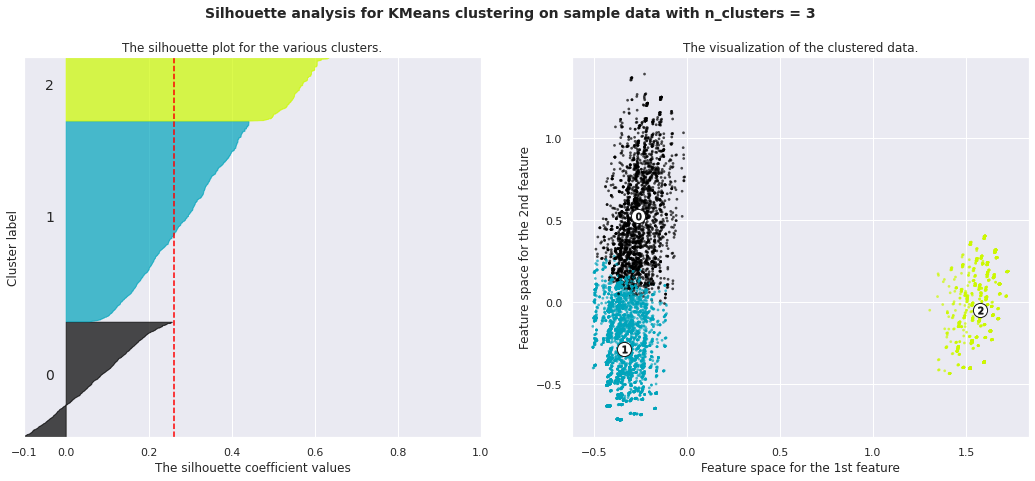

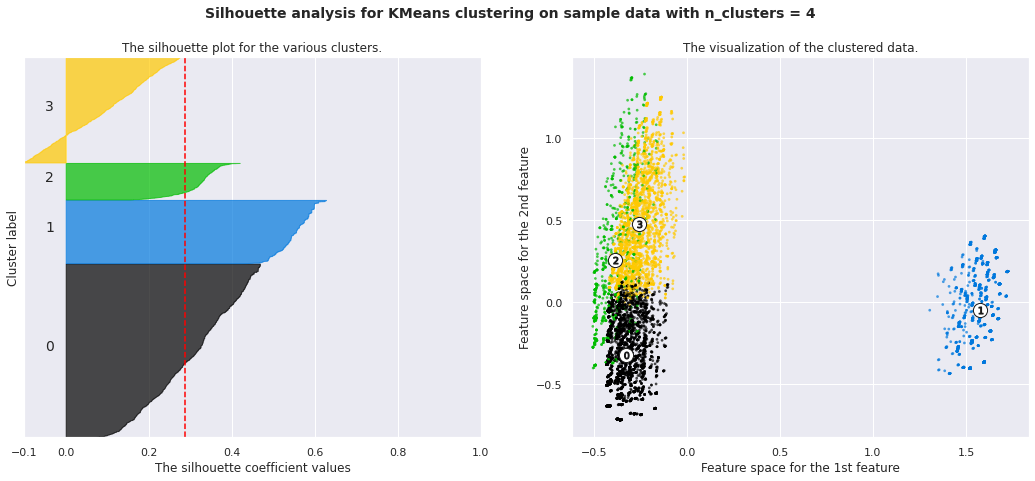

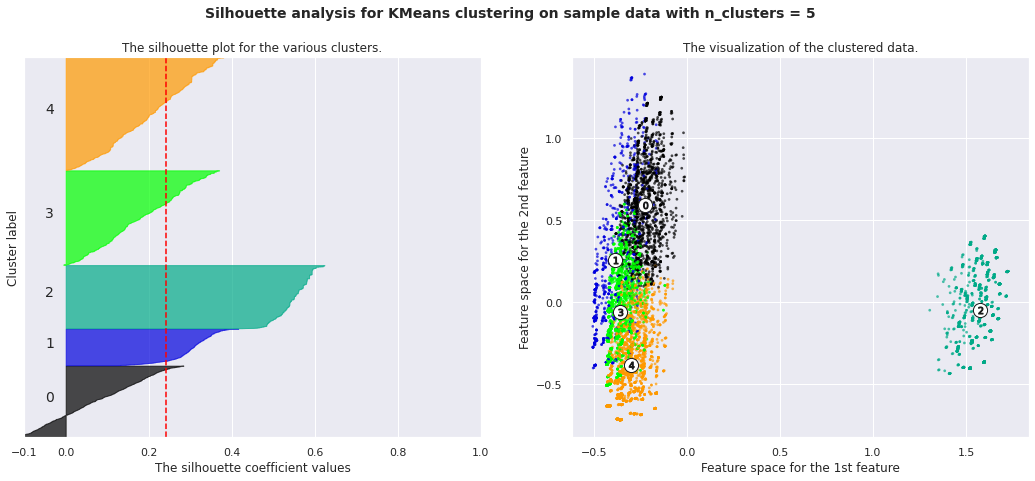

In [ ]:
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init=10, init='k-means++', random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
# compute the silhouette score
silhouette_avg = silhouette_score(df_for_cluster, kmeans.labels_)
print("The average silhouette_score is :", silhouette_avg)

The average silhouette_score is : -0.0001529937470799192


In [ ]:
# A list holds the SSE values for each k
wcss = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state = 42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)

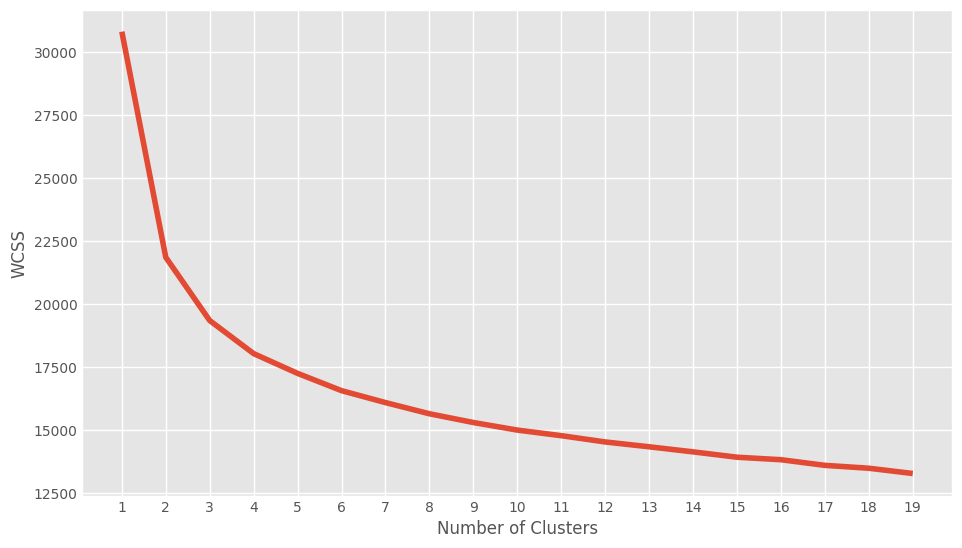

In [ ]:
plt.style.use("ggplot")
plt.plot(range(1, 20), wcss)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [ ]:
from scipy.stats import loguniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import StratifiedKFold

# Develope a LR model

In [ ]:
#optimize the model
# Define hyperparameter grid
param_grid = {
    # 'penalty': ['l1', 'l2'],
    'C': loguniform(1e-3, 100).rvs(size=5),
    'solver': ['liblinear', 'saga'],
    'max_iter': [400, 600]
}

# Create logistic regression model
lr_model = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(lr_model, param_grid, cv=5,
                        #    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           n_jobs=-1, scoring='f1')

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print best hyperparameters and corresponding score
# Access the mean and std of the test scores (accuracy) for each fold
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Access the index of the best combination
best_index = grid_search.best_index_

# Get the mean and std of thevalidation score (F1-score) for the best combination
best_mean_score = mean_scores[best_index]
best_std_score = std_scores[best_index]
# print("\033[1m"+'Average cross-validation scores(5-Fold) after oversampling the minority class= 0 (not very toxic):'+"\033[0;0m")
print(f"\nBest combination ({grid_search.best_params_}):\nMean F1-score = {best_mean_score}, std = {best_std_score}")



Best combination ({'C': 95.28693630147656, 'max_iter': 600, 'solver': 'saga'}):
Mean F1-score = 0.5926327986427646, std = 0.013760645319364584


* The mean F1-score for the best combination of hyperparameters is 0.5876, while the standard deviation is 0.0192. This means that the F1-score varied by an average of 0.0192 across the different cross-validation folds. A low standard deviation is desirable, as it indicates that the model's performance is consistent across the different folds, and is therefore more likely to generalize well to new, unseen data. A high standard deviation, on the other hand, suggests that the model's performance may be more sensitive to the specific partitioning of the data into training and validation sets, and may not generalize as well to new data.

In [ ]:
# Evalue the predictive performance of Logistic Regression model based on the optimal hyperparameters 
lr_model = LogisticRegression(C= 95.28693630147656, max_iter = 600, solver = 'saga', random_state=42)
lr_model.fit(X_train, y_train)
# Make predictions using LR model
y_pred_lr = lr_model.predict(X_test)

In [ ]:
# Evaluate the LR model
# Calculate classification report for LR model
cr_lr = classification_report(y_test, y_pred_lr)
print('Classification report for Logistic Regression model:\n', cr_lr)

Classification report for Logistic Regression model:
               precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.59      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409



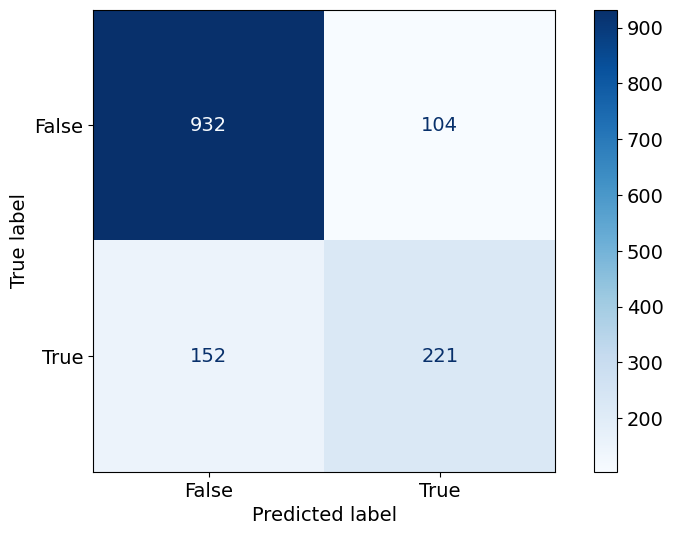

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# set plot style to ggplot2
plt.style.use('default')
# maximize the size of the labels, ticks, and figures
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 14
# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred_lr)
confusion_matrix = confusion_matrix(y_test, y_pred_lr)

cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot(cmap='Blues')
plt.show()

# Sampling Methods

In [ ]:
#optimize the model
# Define hyperparameter grid
param_grid = {
    # 'penalty': ['l1', 'l2'],
    'C': loguniform(1e-3, 100).rvs(size=5),
    'solver': ['liblinear', 'saga', 'newton-cg'],
    'max_iter': [400, 600]
}

# Create logistic regression model
lr_model = LogisticRegression(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(lr_model, param_grid, 
                            cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
                           n_jobs=-1, scoring='accuracy')

# Fit the grid search to the training data
grid_search.fit(X_train_ros, y_train_ros)

# Print best hyperparameters and corresponding score
# Access the mean and std of the test scores (accuracy) for each fold
mean_scores = grid_search.cv_results_['mean_test_score']
std_scores = grid_search.cv_results_['std_test_score']

# Access the index of the best combination
best_index = grid_search.best_index_

# Get the mean and std of thevalidation score (F1-score) for the best combination
best_mean_score = mean_scores[best_index]
best_std_score = std_scores[best_index]
# print("\033[1m"+'Average cross-validation scores(5-Fold) after oversampling the minority class= 0 (not very toxic):'+"\033[0;0m")
print(f"\nBest combination ({grid_search.best_params_}):\nMean F1-score = {best_mean_score}, std = {best_std_score}")



Best combination ({'C': 0.08400017756665068, 'max_iter': 400, 'solver': 'liblinear'}):
Mean F1-score = 0.7624450136462484, std = 0.005272096655461625


In [ ]:
# Evalue the predictive performance of Logistic Regression model based on the optimal hyperparameters 
lr_model_ros= LogisticRegression(C=  0.0840, max_iter = 400, solver = 'liblinear', random_state=42)
lr_model_ros.fit(X_train_ros, y_train_ros)
# Make predictions using LR model
y_pred_lr_ros = lr_model_ros.predict(X_test)

In [ ]:
# Evaluate the LR model
# Calculate classification report for LR model
cr_lr = classification_report(y_test, y_pred_lr_ros)
print('Classification report for Logistic Regression model:\n', cr_lr)

Classification report for Logistic Regression model:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.82      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



# Develope a GB model

In [ ]:

# Instantiate the GB model with hyperparameters
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model on the training data
gb.fit(X_train_ros, y_train_ros)

# Generate predictions on the testing data
y_pred_gb = gb.predict(X_test)

In [ ]:
# Evaluate the LR model
# Calculate classification report for LR model
cr_gb= classification_report(y_test, y_pred_gb)
print('Classification report for Gradient Boosting model:\n', cr_gb)

Classification report for Gradient Boosting model:
               precision    recall  f1-score   support

           0       0.92      0.74      0.82      1036
           1       0.53      0.82      0.65       373

    accuracy                           0.76      1409
   macro avg       0.73      0.78      0.74      1409
weighted avg       0.82      0.76      0.78      1409



# Develope a DT model

In [ ]:
# Create Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_ros, y_train_ros)
# Make predictions using DT model
y_pred_dt = dt_model.predict(X_test)

In [ ]:
# Evaluate the DT model
# Calculate classification report for DT model
print('Classification report for Decision Tree model:')
print(classification_report(y_test, y_pred_dt))

Classification report for Decision Tree model:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1036
           1       0.49      0.48      0.49       373

    accuracy                           0.73      1409
   macro avg       0.65      0.65      0.65      1409
weighted avg       0.73      0.73      0.73      1409



# Develope a RF model

In [ ]:
# Create Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_ros, y_train_ros)
# Make predictions using RF model
y_pred_rf = rf_model.predict(X_test)

In [ ]:
# Calculate classification report for RF model
print('Classification report for Random Forest model:')
print(classification_report(y_test, y_pred_rf))

Classification report for Random Forest model:
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1036
           1       0.60      0.57      0.58       373

    accuracy                           0.78      1409
   macro avg       0.72      0.72      0.72      1409
weighted avg       0.78      0.78      0.78      1409



* https://www.ccs.neu.edu/home/futrelle/teaching/isu535sp2004/finalpapers/clusteringIntro.html (statistical significance is not necessary)